In [1]:
# https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

'''
#Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 333us/step - loss: 1.7904 - acc: 0.3445 - val_loss: 1.5781 - val_acc: 0.4378
Epoch 2/20
50000/50000 [==============================] - 15s 294us/step - loss: 1.4735 - acc: 0.4661 - val_loss: 1.3412 - val_acc: 0.5242
Epoch 3/20
50000/50000 [==============================] - 14s 288us/step - loss: 1.3377 - acc: 0.5221 - val_loss: 1.2398 - val_acc: 0.5572
Epoch 4/20
50000/50000 [==============================] - 14s 284us/step - loss: 1.2366 - acc: 0.5612 - val_loss: 1.1752 - val_acc: 0.5865
Epoch 5/20
50000/50000 [==============================] - 14s 290us/step - loss: 1.149

![alt text](docs/cifar10.jpg)

In [2]:
CIFAR10_LABELS_LIST = [
    'airplane', 
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

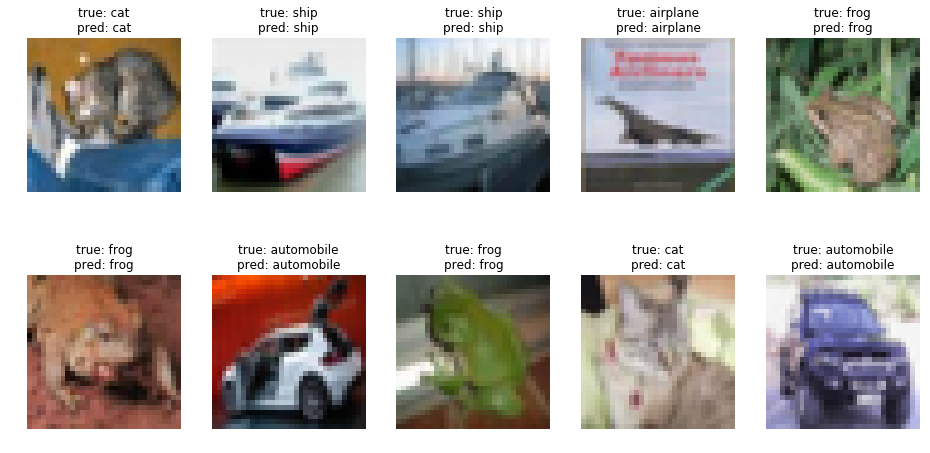

In [4]:
plt.figure(figsize = (16, 8))

for i in range(10):
    image = x_test[i]
    label = np.argmax(y_test[i])
    
    preds = model.predict(np.expand_dims(image, axis=0))
    pred = np.argmax(preds)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title('true: %s\npred: %s' % (CIFAR10_LABELS_LIST[label], CIFAR10_LABELS_LIST[pred]))
    plt.axis('off')

## class foolbox.models.KerasModel(model, bounds, channel_axis=3, preprocessing=(0, 1), predicts='probabilities')

Creates a Model instance from a Keras model.

```
Parameters:	
model:keras.models.Model
The Keras model that should be attacked.

bounds:tuple
Tuple of lower and upper bound for the pixel values, usually (0, 1) or (0, 255).

channel_axis:int
The index of the axis that represents color channels.

preprocessing: 2-element tuple with floats or numpy arrays
Elementwises preprocessing of input; we first subtract the first element of preprocessing from the input and then divide the input by the second element.

predicts:str
Specifies whether the Keras model predicts logits or probabilities. Logits are preferred, but probabilities are the default.
```

In [5]:
import foolbox

fmodel = foolbox.models.KerasModel(model, bounds=(0, 1))

## class foolbox.attacks.SinglePixelAttack(model=None, criterion=None, distance=None, threshold=None)

## \__call__(input_or_adv, label=None, unpack=True, max_pixels=1000)

Perturbs just a single pixel and sets it to the min or max.

```
Parameters:	
input_or_adv:numpy.ndarray or Adversarial
The original, correctly classified image. If image is a numpy array, label must be passed as well. If image is an Adversarial instance, label must not be passed.

label:int
The reference label of the original image. Must be passed if image is a numpy array, must not be passed if image is an Adversarial instance.

unpack:bool
If true, returns the adversarial image, otherwise returns the Adversarial object.

max_pixels:int
Maximum number of pixels to try.
```

In [6]:
attack = foolbox.attacks.SinglePixelAttack(fmodel)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/foolbox/attacks/base.py:148: UserWarning: SinglePixelAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))


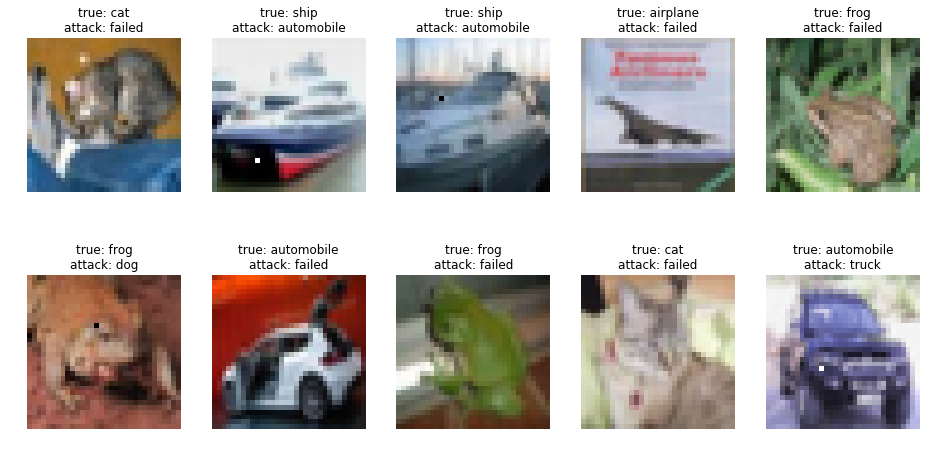

In [7]:
plt.figure(figsize = (16, 8))

for i in range(10):
    image = x_test[i]
    label = np.argmax(y_test[i])
    
    preds = model.predict(np.expand_dims(image, axis=0))
    pred = np.argmax(preds)
    
    if label == pred:
        adversarial = attack(image, label, max_pixels=32*32)
        
        if adversarial is None:
            plt.subplot(2, 5, i+1)
            plt.imshow(image)
            plt.title('true: %s\nattack: %s' % (CIFAR10_LABELS_LIST[label], 'failed'))
            plt.axis('off')
        else:
            preds = model.predict(np.expand_dims(adversarial, axis=0))
            pred = np.argmax(preds)

            plt.subplot(2, 5, i+1)
            plt.imshow(adversarial)
            plt.title('true: %s\nattack: %s' % (CIFAR10_LABELS_LIST[label], CIFAR10_LABELS_LIST[pred]))
            plt.axis('off')
    else:
        plt.subplot(2, 5, i+1)
        plt.imshow(image)
        plt.title('true: %s\nattack: %s' % (CIFAR10_LABELS_LIST[label], 'passed'))
        plt.axis('off')

plt.savefig('docs/single-pixel.jpg')